<a href="https://colab.research.google.com/github/KayalvizhiT513/Walmart_lab1/blob/main/Simulating_the_Reduction_of_Idiosyncratic_Risk_through_Diversification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
stock_df = pd.read_excel('/content/Stock Beta Variance.xlsx')
stock_df.head()

,STOCK,BETA,Variance of Error Term (σ²)
0,1,2.0,0.0025
1,2,0.5,0.0016
2,3,3.0,0.0009
3,4,0.2,0.0009
4,5,1.5,0.0025


In [46]:
stock_df['BETA'].mean()

np.float64(2.07)

In [51]:
np.sqrt((2.07*2.07)*(0.04))

np.float64(0.414)

In [52]:
(2.07*2.07)*(0.04)

0.171396

In [3]:
mean_M = 0.15
var_M = 0.04
rf = 0.02

In [5]:
# ri = rf + beta_i(rm - rf)
stock_df['ri'] = rf + stock_df['BETA'] * (mean_M - rf)
stock_df.head()

,STOCK,BETA,Variance of Error Term (σ²),ri
0,1,2.0,0.0025,0.280
1,2,0.5,0.0016,0.085
2,3,3.0,0.0009,0.410
3,4,0.2,0.0009,0.046
4,5,1.5,0.0025,0.215


In [6]:
rp = stock_df['ri'].mean()
rp

np.float64(0.2891)

In [7]:
# Simulation parameters
n_sim = 10000
n_stocks = len(stock_df)

# Draw 10,000 market returns from N(0.15, 0.04)
market_returns = np.random.normal(loc=mean_M, scale=np.sqrt(var_M), size=n_sim)

# Prepare array to hold portfolio returns
portfolio_returns = np.zeros(n_sim)

In [8]:
# Loop over each simulation
for i in range(n_sim):
    rm = market_returns[i]
    stock_returns = []

    for _, row in stock_df.iterrows():
        beta = row['BETA']
        var_e = row['Variance of Error Term (σ²)']
        epsilon = np.random.normal(loc=0, scale=np.sqrt(var_e))
        ri = rf + beta * (rm - rf) + epsilon
        stock_returns.append(ri)

    # Equal-weighted portfolio return
    portfolio_returns[i] = np.mean(stock_returns)

In [9]:
# Empirical results
expected_rp_sim = np.mean(portfolio_returns)
std_rp_sim = np.std(portfolio_returns)

print(f"Simulated Expected Portfolio Return (E[Rp]): {expected_rp_sim:.4f}")
print(f"Simulated Portfolio Standard Deviation (σp): {std_rp_sim:.4f}")

Simulated Expected Portfolio Return (E[Rp]): 0.2819
Simulated Portfolio Standard Deviation (σp): 0.4195


In [10]:
# Theoretical βp and σp assuming diversified idiosyncratic risk
beta_p = stock_df['BETA'].mean()
sigma_p_theoretical = beta_p * np.sqrt(var_M)
expected_rp_theoretical = rf + beta_p * (mean_M - rf)

print(f"Theoretical Expected Portfolio Return: {expected_rp_theoretical:.4f}")
print(f"Theoretical Portfolio Standard Deviation: {sigma_p_theoretical:.4f}")

Theoretical Expected Portfolio Return: 0.2891
Theoretical Portfolio Standard Deviation: 0.4140


In [44]:
def simulate_portfolio_returns_with_diversification(n_sim):
    print("\nNumber of portfolios:", n_sim)
    n_stocks = len(stock_df)

    # Draw 10,000 market returns from N(0.15, 0.04)
    market_returns = np.random.normal(loc=mean_M, scale=np.sqrt(var_M), size=n_sim)
    print("Market returns:", market_returns)

    # Prepare array to hold portfolio returns
    portfolio_returns = np.zeros(n_sim)

    # Loop over each simulation
    for i in range(n_sim):
        rm = market_returns[i]
        stock_returns = []

        for _, row in stock_df.iterrows():
            beta = row['BETA']
            var_e = row['Variance of Error Term (σ²)']
            epsilon = np.random.normal(loc=0, scale=np.sqrt(var_e))
            ri = rf + beta * (rm - rf) + epsilon
            stock_returns.append(ri)

        # Equal-weighted portfolio return
        portfolio_returns[i] = np.mean(stock_returns)

    # Empirical results
    expected_rp_sim = np.mean(portfolio_returns)
    std_rp_sim = np.std(portfolio_returns)

    print(f"Simulated Expected Portfolio Return (E[Rp]): {expected_rp_sim:.4f}")
    print(f"Simulated Portfolio Standard Deviation (σp): {std_rp_sim:.4f}")

    # Theoretical βp and σp assuming diversified idiosyncratic risk
    beta_p = stock_df['BETA'].mean()
    sigma_p_theoretical = beta_p * np.sqrt(var_M)
    variance_p_theoretical = beta_p * beta_p * var_M
    expected_rp_theoretical = rf + beta_p * (mean_M - rf)

    print(f"(Assuming εi = 0)Theoretical Expected Portfolio Return: {expected_rp_theoretical:.4f}")
    print(f"(Assuming εi = 0)Theoretical Portfolio Standard Deviation: {sigma_p_theoretical:.4f}")
    print(f"(Assuming εi = 0)Theoretical Portfolio Variance: {variance_p_theoretical:.4f}")

    return expected_rp_sim, std_rp_sim, expected_rp_theoretical, sigma_p_theoretical

In [45]:
simulate_portfolio_returns_with_diversification(5)


Number of portfolios: 5
Market returns: [0.2837526  0.57355268 0.27789172 0.21343703 0.26930172]
Simulated Expected Portfolio Return (E[Rp]): 0.6464
Simulated Portfolio Standard Deviation (σp): 0.2663
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140


(np.float64(0.6463518895458357),
 np.float64(0.2663146535203187),
 np.float64(0.2891),
 np.float64(0.414))

In [38]:
import matplotlib.pyplot as plt

# Setup
portfolio_sizes = [1, 10, 50, 100, 250, 500, 750, 1000, 5000, 10000]
expected_rp_sim = []
std_rp_sim = []
expected_rp_theoretical = []
sigma_p_theoretical = []

# Loop over portfolio sizes
for i in portfolio_sizes:
    rp_sim, std_sim, rp_theo, std_theo = simulate_portfolio_returns_with_diversification(i)
    expected_rp_sim.append(rp_sim)
    std_rp_sim.append(std_sim)
    expected_rp_theoretical.append(rp_theo)
    sigma_p_theoretical.append(std_theo)



Number of portfolios: 1
Simulated Expected Portfolio Return (E[Rp]): 0.4359
Simulated Portfolio Standard Deviation (σp): 0.0000
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 10
Simulated Expected Portfolio Return (E[Rp]): 0.2250
Simulated Portfolio Standard Deviation (σp): 0.1865
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 50
Simulated Expected Portfolio Return (E[Rp]): 0.2912
Simulated Portfolio Standard Deviation (σp): 0.4010
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 100
Simulated Expected Portfolio Return (E[Rp]): 0.3203
Simulated Portfolio Standard Deviation (σp): 0.4119
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical P

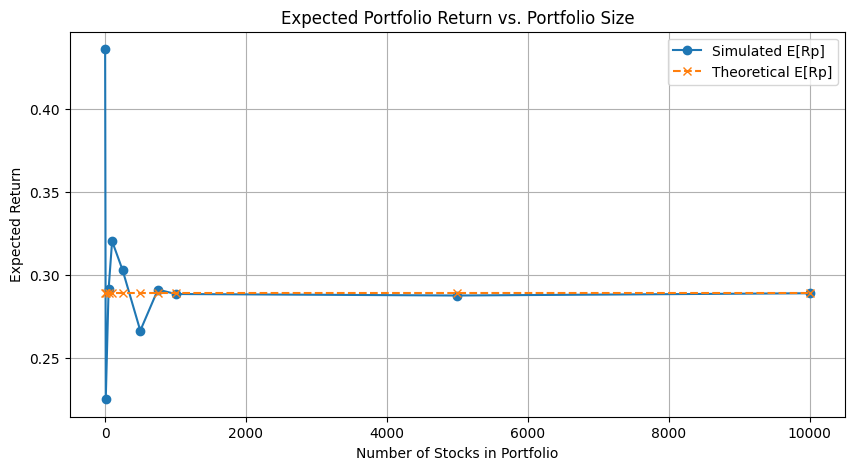

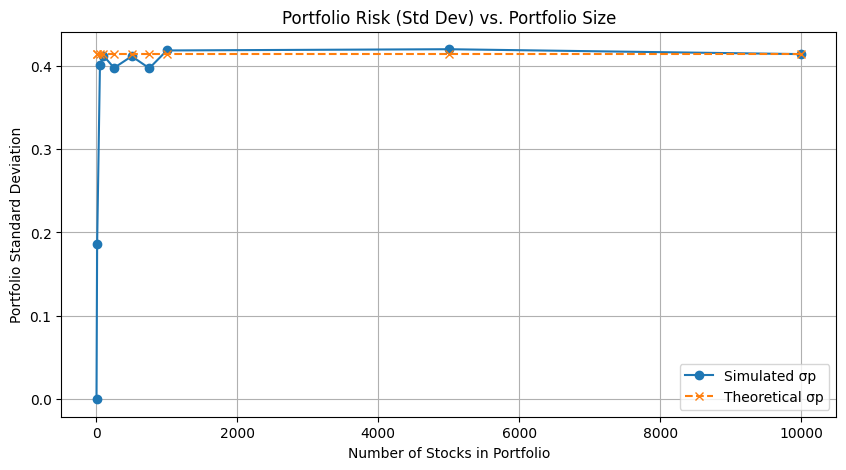

In [39]:
# Plotting Expected Return (E[Rp])
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, expected_rp_sim, marker='o', label='Simulated E[Rp]')
plt.plot(portfolio_sizes, expected_rp_theoretical, marker='x', linestyle='--', label='Theoretical E[Rp]')
plt.xlabel('Number of Stocks in Portfolio')
plt.ylabel('Expected Return')
plt.title('Expected Portfolio Return vs. Portfolio Size')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Standard Deviation (σp)
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, std_rp_sim, marker='o', label='Simulated σp')
plt.plot(portfolio_sizes, sigma_p_theoretical, marker='x', linestyle='--', label='Theoretical σp')
plt.xlabel('Number of Stocks in Portfolio')
plt.ylabel('Portfolio Standard Deviation')
plt.title('Portfolio Risk (Std Dev) vs. Portfolio Size')
plt.legend()
plt.grid(True)
plt.show()


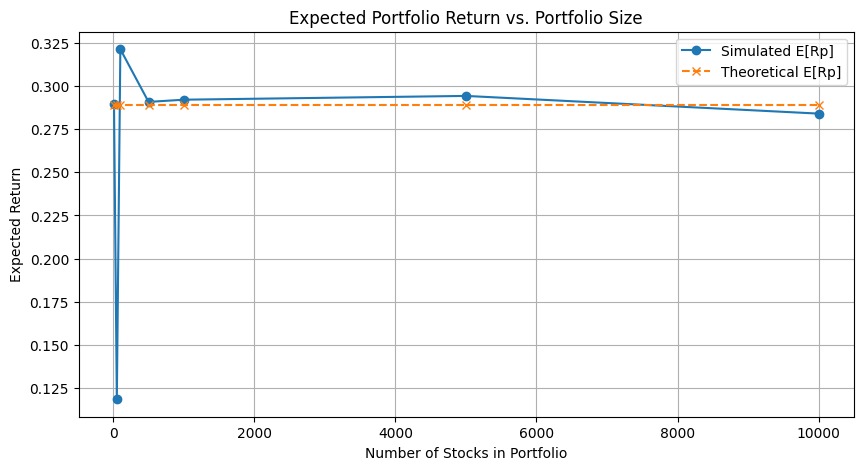

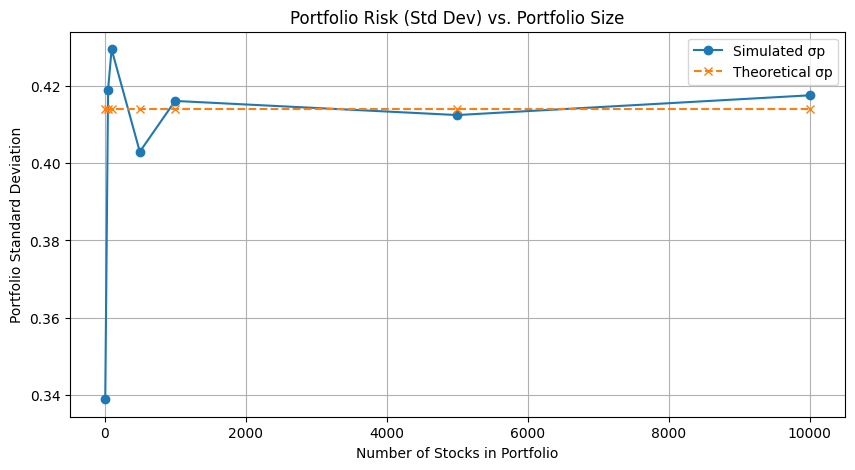

In [32]:
# Plotting Expected Return (E[Rp])
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, expected_rp_sim, marker='o', label='Simulated E[Rp]')
plt.plot(portfolio_sizes, expected_rp_theoretical, marker='x', linestyle='--', label='Theoretical E[Rp]')
plt.xlabel('Number of Stocks in Portfolio')
plt.ylabel('Expected Return')
plt.title('Expected Portfolio Return vs. Portfolio Size')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Standard Deviation (σp)
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, std_rp_sim, marker='o', label='Simulated σp')
plt.plot(portfolio_sizes, sigma_p_theoretical, marker='x', linestyle='--', label='Theoretical σp')
plt.xlabel('Number of Stocks in Portfolio')
plt.ylabel('Portfolio Standard Deviation')
plt.title('Portfolio Risk (Std Dev) vs. Portfolio Size')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
e1 = np.random.normal(0, np.sqrt(0.0016), 10000)
e2 = np.random.normal(0, np.sqrt(0.0025), 10000)
rm = np.random.normal(0.15, np.sqrt(0.04), 10000)

print("Cov(e1, e2):", np.cov(e1, e2)[0,1])
print("Cov(rm, e1):", np.cov(rm, e1)[0,1])


Cov(e1, e2): 6.354401967588892e-06
Cov(rm, e1): -9.536893137849543e-05


In [42]:
import matplotlib.pyplot as plt

# Setup
portfolio_sizes = [1, 50, 100, 200, 500, 1000, 1500, 2500, 5000, 10000]
expected_rp_sim = []
std_rp_sim = []
expected_rp_theoretical = []
sigma_p_theoretical = []

# Loop over portfolio sizes
for i in portfolio_sizes:
    rp_sim, std_sim, rp_theo, std_theo = simulate_portfolio_returns_with_diversification(i)
    expected_rp_sim.append(rp_sim)
    std_rp_sim.append(std_sim)
    expected_rp_theoretical.append(rp_theo)
    sigma_p_theoretical.append(std_theo)



Number of portfolios: 1
Simulated Expected Portfolio Return (E[Rp]): -0.2558
Simulated Portfolio Standard Deviation (σp): 0.0000
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 50
Simulated Expected Portfolio Return (E[Rp]): 0.3827
Simulated Portfolio Standard Deviation (σp): 0.3776
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 100
Simulated Expected Portfolio Return (E[Rp]): 0.2841
Simulated Portfolio Standard Deviation (σp): 0.4308
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical Portfolio Standard Deviation: 0.4140

Number of portfolios: 200
Simulated Expected Portfolio Return (E[Rp]): 0.2594
Simulated Portfolio Standard Deviation (σp): 0.4112
(Assuming εi = 0)Theoretical Expected Portfolio Return: 0.2891
(Assuming εi = 0)Theoretical

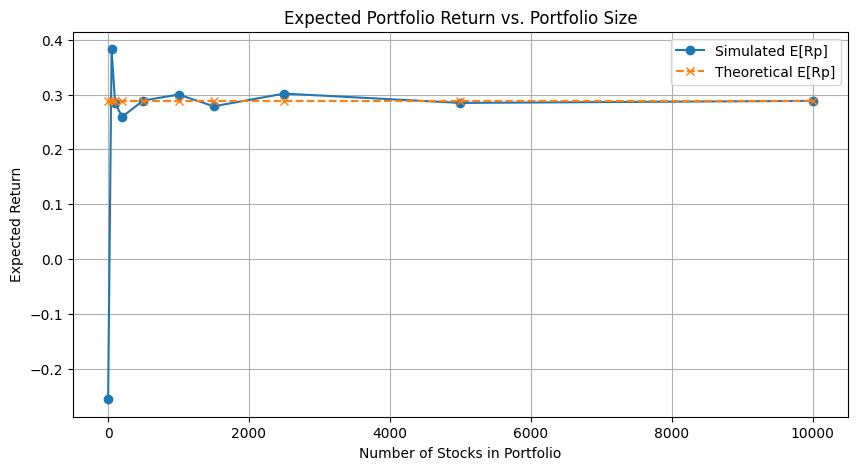

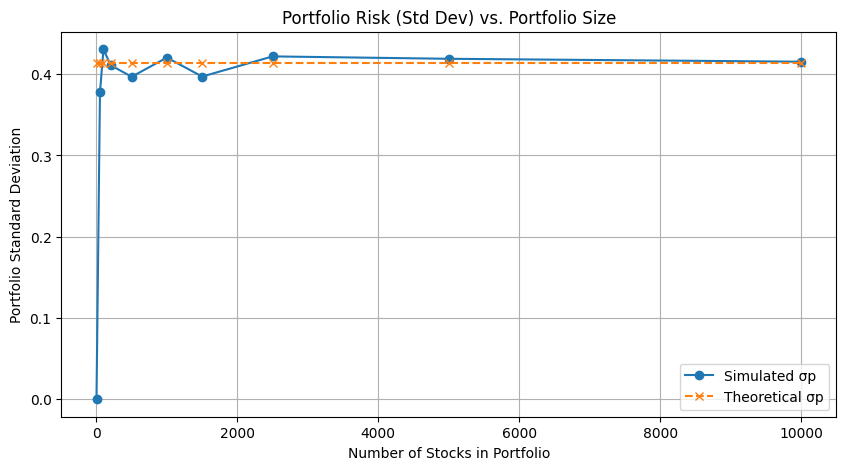

In [43]:
# Plotting Expected Return (E[Rp])
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, expected_rp_sim, marker='o', label='Simulated E[Rp]')
plt.plot(portfolio_sizes, expected_rp_theoretical, marker='x', linestyle='--', label='Theoretical E[Rp]')
plt.xlabel('Number of Portfolios')
plt.ylabel('Expected Return')
plt.title('Expected Portfolio Return vs. Number of Portfolios')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Standard Deviation (σp)
plt.figure(figsize=(10, 5))
plt.plot(portfolio_sizes, std_rp_sim, marker='o', label='Simulated σp')
plt.plot(portfolio_sizes, sigma_p_theoretical, marker='x', linestyle='--', label='Theoretical σp')
plt.xlabel('Number of Portfolios')
plt.ylabel('Variance(Rp)')
plt.title('Portfolio Risk (Variance) vs. Number of Portfolios')
plt.legend()
plt.grid(True)
plt.show()
